In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

# State-Level Viszualizations

In [1]:
# dictionary for translating state abbreviations
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [2]:
# importing state level data
svi_2014 = pd.read_csv('./data/svi-mortality-state/2014-svi-mortality.csv')
svi_2016 = pd.read_csv('./data/svi-mortality-state/2016-svi-mortality.csv')
svi_2018 = pd.read_csv('./data/svi-mortality-state/2018-svi-mortality.csv')
svi_2020 = pd.read_csv('./data/svi-mortality-state/2020-svi-mortality.csv')

# doing math
change_2014_2020 = pd.DataFrame(svi_2014['ST_ABBR'])
change_2014_2020['Change in Deaths per 100,000 Population'] = svi_2020['Deaths per 100,000 Population'] - svi_2014['Deaths per 100,000 Population']

In [3]:
# 2014 state map
fig = px.choropleth(svi_2014,
                    locations='ST_ABBR',
                    locationmode='USA-states',
                    scope='usa',
                    color='Deaths per 100,000 Population',
                    color_continuous_scale='balance',
                    title='2014 Heart-Related Deaths',
                    width=1200,
                    height=600
                    )

fig.write_image('./images/2014-deaths-graph.png')
fig.show()

In [4]:
# 2020 state map
fig = px.choropleth(svi_2020,
                    locations='ST_ABBR',
                    locationmode='USA-states',
                    scope='usa',
                    color='Deaths per 100,000 Population',
                    color_continuous_scale='balance',
                    title='2020 Heart-Related Deaths',
                    width=1200,
                    height=600
                    )

fig.write_image('./images/2020-deaths-graph.png')
fig.show()

In [5]:
# change in deaths map
fig = px.choropleth(change_2014_2020,
                    locations='ST_ABBR',
                    locationmode='USA-states',
                    scope='usa',
                    color='Change in Deaths per 100,000 Population',
                    color_continuous_scale='balance',
                    title='Change in Total Heart-Related Deaths Between 2014 and 2020',
                    width=1200,
                    height=600
                    )

fig.write_image('./images/2014-2020-change-graph.png')
fig.show()

In [6]:
change_2014_2020.sort_values('Change in Deaths per 100,000 Population').head()

,ST_ABBR,"Change in Deaths per 100,000 Population"
7,DC,-16.604987
28,ND,-6.566692
19,MA,-5.945925
39,RI,-3.034995
41,SD,2.067199


In [7]:
bottom_five_states = change_2014_2020.sort_values('Change in Deaths per 100,000 Population').head()     # get states with most decrease heart-related deaths
top_five_states = change_2014_2020.sort_values('Change in Deaths per 100,000 Population').tail()        # get states with most increase in heart-related deaths

# combine bottom and top 5 back into one dataframe
top_bottom_five = pd.concat([bottom_five_states, top_five_states])
top_bottom_five.sort_values('Change in Deaths per 100,000 Population')
top_bottom_five = top_bottom_five.iloc[::-1]
top_bottom_five['State'] = top_bottom_five['ST_ABBR'].replace(states)
top_bottom_five.drop('ST_ABBR', axis=1, inplace=True)
top_bottom_five.set_index('State', inplace=True)


In [8]:
top_bottom_five

,"Change in Deaths per 100,000 Population"
State,
Mississippi,42.850214
Alabama,42.563217
Oklahoma,39.443483
New Mexico,36.712873
Vermont,33.660267
South Dakota,2.067199
Rhode Island,-3.034995
Massachusetts,-5.945925
North Dakota,-6.566692


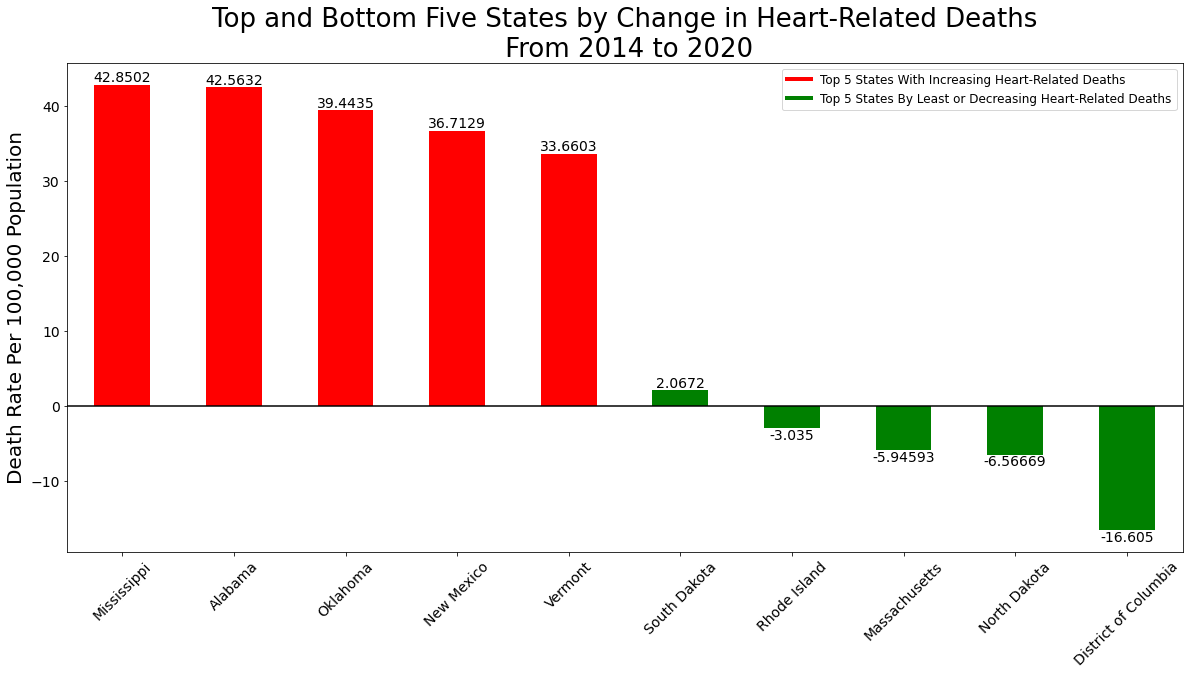

In [9]:
# used to create custom legend
from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='g', lw=4)]

# logic to change color of columns
def bar_color(df,color1,color2):
    return np.where(df.values>20,color1,color2).T

# creating plt
ax = top_bottom_five['Change in Deaths per 100,000 Population'].plot(kind='bar', figsize=(20, 10), color=bar_color(top_bottom_five['Change in Deaths per 100,000 Population'], 'r', 'g'))

# labelling
plt.title('Top and Bottom Five States by Change in Heart-Related Deaths\n From 2014 to 2020', fontsize=26)
plt.xlabel('', fontsize=20)
plt.ylabel('Death Rate Per 100,000 Population', fontsize=20)

# customizing
plt.axhline(y=0, color='black')
plt.legend(custom_lines, ['Top 5 States With Increasing Heart-Related Deaths', 'Top 5 States By Least or Decreasing Heart-Related Deaths'], fontsize=12)
plt.bar_label(ax.containers[0], fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.gcf().subplots_adjust(bottom=0.2)   # this line adjusts the padding around the image when saving to prevent cut-off
plt.savefig('./images/top-bottom-five-states.png')
plt.show()

In [ ]:
# high school degree per 100k

# County Stats

In [6]:
totals_df = pd.read_csv('./data/machine-learning.csv', index_col=0)
totals_df.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,...,C-E_LIMENG,C-E_MUNIT,C-E_MOBILE,C-E_CROWD,C-E_NOVEH,C-E_GROUPQ,C-E_UNINSUR,C-E_DAYPOP,C-Deaths,"C-Deaths per 100,000 Population"
10001_2016,171474.0,68106.0,62140.0,21866.0,6596.0,14727.0,26575.0,40490.0,23460.0,6883.0,...,89.0,219.0,-73.0,348.0,102.0,53.0,-393.0,16409.0,45.0,21.469129
10001_2018,174822.0,70576.0,64545.0,22968.0,4961.0,14930.0,28461.0,40611.0,24906.0,7005.0,...,369.0,209.0,76.0,55.0,238.0,66.0,-1090.0,-13024.0,4.0,-2.045299
10001_2020,179124.0,73073.0,67299.0,37909.0,5238.0,14448.0,30665.0,41125.0,28206.0,6186.0,...,704.0,429.0,99.0,-117.0,299.0,-309.0,848.0,20054.0,33.0,13.037733
10003_2016,551997.0,220459.0,202524.0,60817.0,20043.0,35611.0,76111.0,122399.0,60175.0,19432.0,...,-740.0,553.0,134.0,-337.0,46.0,166.0,-8639.0,-16359.0,34.0,4.218034
10003_2018,555133.0,222146.0,203855.0,61530.0,18464.0,32485.0,81440.0,121184.0,59939.0,17973.0,...,-1241.0,1141.0,-703.0,-213.0,-613.0,-166.0,-8495.0,-55911.0,3.0,-0.467631


In [10]:
totals_df[['C-Deaths', 'C-Deaths per 100,000 Population']].describe()

,C-Deaths,"C-Deaths per 100,000 Population"
count,8576.000000,8576.000000
mean,9.608442,8.100119
std,47.788679,57.856419
min,-215.000000,-376.713969
25%,-5.000000,-19.219626
50%,3.000000,6.951641
75%,15.000000,36.504127
max,1496.000000,313.215948


In [13]:
totals_df.sort_values(by=['C-Deaths per 100,000 Population']).head(50)

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,...,C-E_LIMENG,C-E_MUNIT,C-E_MOBILE,C-E_CROWD,C-E_NOVEH,C-E_GROUPQ,C-E_UNINSUR,C-E_DAYPOP,C-Deaths,"C-Deaths per 100,000 Population"
38027_2016,2370.0,1320.0,1043.0,306.0,26.0,185.0,496.0,542.0,295.0,81.0,...,-2.0,-3.0,-9.0,1.0,-1.0,0.0,35.0,105.0,-9.0,-376.713969
31015_2018,2042.0,1408.0,903.0,213.0,15.0,82.0,575.0,455.0,356.0,28.0,...,2.0,-13.0,-5.0,0.0,-3.0,0.0,39.0,-148.0,-7.0,-359.499367
35023_2020,4234.0,2467.0,1742.0,1510.0,121.0,530.0,926.0,930.0,804.0,95.0,...,-12.0,32.0,66.0,24.0,-6.0,9.0,-25.0,-149.0,-14.0,-312.890160
48385_2020,3429.0,2671.0,1254.0,1167.0,13.0,292.0,1019.0,774.0,916.0,44.0,...,2.0,6.0,-41.0,9.0,30.0,2.0,-153.0,-230.0,-10.0,-298.858581
31169_2020,5000.0,2757.0,2247.0,992.0,44.0,257.0,1287.0,1131.0,679.0,86.0,...,-9.0,5.0,-9.0,-4.0,23.0,-8.0,50.0,-291.0,-14.0,-270.388388
46089_2016,2252.0,1405.0,1004.0,404.0,65.0,363.0,664.0,369.0,385.0,28.0,...,4.0,17.0,7.0,0.0,-26.0,2.0,70.0,212.0,-7.0,-263.988584
20049_2020,2502.0,1754.0,1150.0,753.0,60.0,219.0,721.0,549.0,557.0,31.0,...,0.0,-2.0,-58.0,8.0,-9.0,-17.0,37.0,-73.0,-7.0,-263.863850
13065_2018,6743.0,2997.0,2502.0,2605.0,160.0,1312.0,1023.0,1810.0,1019.0,327.0,...,-20.0,-8.0,246.0,64.0,-73.0,56.0,22.0,-637.0,-18.0,-261.071489
46067_2018,7315.0,3398.0,2862.0,742.0,149.0,616.0,1685.0,1805.0,1069.0,134.0,...,-3.0,-4.0,-13.0,-2.0,39.0,-141.0,-231.0,-522.0,-18.0,-250.004893
1131_2016,11119.0,5619.0,3792.0,3768.0,763.0,1499.0,1974.0,2598.0,2007.0,302.0,...,4.0,-7.0,107.0,-29.0,113.0,7.0,-413.0,-147.0,-29.0,-248.453052
